In [1]:
import WAN
import os
import mat73
dataset = 'authorshipData.mat' # store the human paper
# here the aim is to convert the text into WAN

In [3]:
import json
gpt_response = "responses.json"
gpt_papers = []
with open(gpt_response,'r') as f:
    response = f.readline()
    gpt_papers.append(json.loads(response))


# show the basic structure of original human expercet

In [4]:
val_papers = [] # the novel generated by chat gpt, where the topic is assigned, and randomness is changing
gpt_response2 = "responses_2.json"
with open(gpt_response2,'r') as f:
    response = f.readline()
    val_papers.append(json.loads(response))

In [5]:
human_data = mat73.loadmat(dataset)


In [6]:
print(human_data.keys())
for i in human_data["all_wans"]:
    print(i.shape)
print(human_data['function_words'])

for i in human_data["all_freqs"]:
    print(i.shape)
print(human_data["all_wans"][0][:,:,3][0],human_data["all_freqs"][0][:,3])

dict_keys(['all_authors', 'all_freqs', 'all_wans', 'function_words'])
(211, 211, 337)
(211, 211, 448)
(211, 211, 284)
(211, 211, 328)
(211, 211, 467)
(211, 211, 771)
(211, 211, 682)
(211, 211, 907)
(211, 211, 936)
(211, 211, 626)
(211, 211, 405)
(211, 211, 439)
(211, 211, 1022)
(211, 211, 299)
(211, 211, 212)
(211, 211, 595)
(211, 211, 415)
(211, 211, 613)
(211, 211, 423)
(211, 211, 366)
(211, 211, 555)
[['a'], ['bit'], ['couple'], ['aboard'], ['about'], ['above'], ['absent'], ['according'], ['accordingly'], ['across'], ['after'], ['against'], ['ahead'], ['albeit'], ['all'], ['along'], ['alongside'], ['although'], ['amid'], ['amidst'], ['among'], ['amongst'], ['an'], ['and'], ['another'], ['any'], ['anybody'], ['anyone'], ['anything'], ['around'], ['as'], ['aside'], ['astraddle'], ['astride'], ['at'], ['away'], ['bar'], ['barring'], ['because'], ['before'], ['behind'], ['below'], ['beneath'], ['beside'], ['besides'], ['between'], ['beyond'], ['both'], ['but'], ['by'], ['can'], ['certai

In [7]:
print(human_data["all_authors"])

[['abbott'], ['stevenson'], ['alcott'], ['alger'], ['allen'], ['austen'], ['bronte'], ['cooper'], ['dickens'], ['garland'], ['hawthorne'], ['james'], ['melville'], ['page'], ['thoreau'], ['twain'], ['doyle'], ['irving'], ['poe'], ['jewett'], ['wharton']]


In [8]:
human_data.keys()
print(human_data['all_wans'][0].shape)
function_words = [word[0] for word in human_data['function_words']]
print(len(function_words))


(211, 211, 337)
224


In [9]:
human_data['all_freqs'][0].shape

(211, 337)

# load chatgpt expercerts

In [94]:
def load_gpt(function_words,windowWidth,file = "responses.json"):
    gpt_response = file
    gpt_papers = []
    WANS = []
    
    wordcounts = []
    with open(gpt_response,'r') as f:
        count = 0
        while(True):
            response = f.readline().strip()
            if response:
                #print("an error ",dict(eval(response)))
                try:
                    gpt_papers.append(dict(eval(response)))
                except:
                    count+=1
                    print("an error ",count)
                
                    
            else:
                break
    for paper in gpt_papers:
        #paper = json.loads()
        
        papers = list(paper.items()) # all dictionary the last items is paper
       
        papers = papers[:-1]
        #print(papers)
        for writer,novel in papers:
            #print(writer,novel)
            
            # generate WAN for novel and store it in to gptWANs
            (text1Scores, text1Counts) = WAN.countFWs(WAN.cleanUp(novel),function_words,windowWidth)
            WAN1 = WAN.normalize(text1Scores) 
            
            WANS.append(WAN1)
            wordcounts.append(text1Counts)
    return wordcounts, WANS
            
            

In [96]:
val_wordcounts, val_WANS = load_gpt(function_words[:211],5,"responses_2.json")
print(len(val_wordcounts),len(val_WANS))
# obtain wans and word counts last 13 word is unnecessary
#wordcounts, WANS = load_gpt(function_words[:211],5,"responses.json") # original dataset
#import pickle
#with open("response_WANS",'wb') as f:
#    pickle.dump((wordcounts,WANS),f)
with open("response2_WANS.txt",'wb') as f:
    pickle.dump((val_wordcounts,val_WANS),f)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



864 864


In [98]:
import pickle
with open("response_WANS",'rb') as f:
    (wordcounts,WANS)= pickle.load(f)
with open("response2_WANS.txt",'rb') as f:
    (val_wordcounts,val_WANS) =pickle.load(f)

In [120]:

print(np.array(val_wordcounts[9]).sum())

0


In [99]:
import numpy as np
print(len(WANS),np.array(wordcounts).shape)

1812 (1812, 211)


# convert Chatgpt to dataset

In [12]:

import torch_geometric
from torch.nn.functional import normalize

import networkx as nx
from networkx import from_numpy_array
from torch_geometric.data import Data,Dataset
from torch_geometric.utils import from_networkx

In [101]:
import torch
def generate_graphs(wordcounts,WANS2):
    Graphs = []
    count=0
    for i in range(len(wordcounts)):
        adj_matrix = np.array(WANS2[i])
        #print(val_wordcounts,adj_matrix)
        try:
            graph = from_numpy_array(adj_matrix,create_using=nx.DiGraph)

            data = from_networkx(graph)
            edge_index = data.edge_index
            edge_attr = data.weight
            signal = torch.tensor(wordcounts[i],dtype =torch.float64 )

            signal = (signal-signal.mean())/(signal.std())

            g = Data(x = signal.reshape(-1,1), edge_index = edge_index,edge_attr = edge_attr,y = torch.tensor([[0]])) # i define chat gpt's label as zero
            Graphs.append(g)
        except:
            count+=1
            print(count)
            
    return Graphs

In [102]:
val_graphs = generate_graphs(val_wordcounts,val_WANS)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [62]:
Graphs = generate_graphs(wordcounts,WANS)

########################################################################
# now include human novels into the dataset
print(len(Graphs))

AttributeError: 'GlobalStorage' object has no attribute 'weight'

In [52]:
for i in range(len(human_data["all_authors"])):
    print(human_data["all_authors"][i])
    author_excerpts = torch.tensor(human_data["all_wans"][i])
    
    num_papers = author_excerpts.shape[-1]
    for num in range(92):#num_papers): # keep balanced num between true/false samples
        adj_matrix = author_excerpts[:,:,num]
        signal = human_data["all_freqs"][i][:,num].reshape(-1,1)
        signal = torch.tensor(signal,dtype=torch.float64)
        signal = (signal-signal.mean())/(signal.std())
        y = torch.tensor([[1]])
        adj_matrix = np.array(adj_matrix)
        
        adj_matrix /= (adj_matrix.sum(axis = 1).reshape(-1,1)+0.0000001)
        graph = from_numpy_array(adj_matrix,create_using=nx.DiGraph)
       
        data = from_networkx(graph)
        edge_index = data.edge_index
        edge_attr = data.weight
        g = Data(x = signal, edge_index = edge_index,edge_attr = edge_attr,y = y) # i define chat gpt's label as zero
        Graphs.append(g)

['abbott']
['stevenson']
['alcott']
['alger']
['allen']
['austen']
['bronte']
['cooper']
['dickens']
['garland']
['hawthorne']
['james']
['melville']
['page']
['thoreau']
['twain']
['doyle']
['irving']
['poe']
['jewett']
['wharton']


In [53]:
# store data into pickle
with open("graph_dataset.txt",'wb') as f:
    pickle.dump(Graphs,f)
print(len(Graphs))

3744


# Model GCNN

In [54]:
from torch_geometric.loader import DataLoader
from sklearn.model_selection import train_test_split

In [55]:
train_test = train_test_split(Graphs,train_size = 0.7,test_size = 0.3, shuffle=True)
print(len(Graphs),Graphs[12])

3744 Data(x=[211, 1], edge_index=[2, 203], edge_attr=[203], y=[1, 1])


In [56]:
train_loader = DataLoader(train_test[0],batch_size = 128)
test_loader =  DataLoader(train_test[1],batch_size = 128)
val_loader = DataLoader(val_)

In [57]:
for i in train_loader:
    print(i)
    

DataBatch(x=[27008, 1], edge_index=[2, 59537], edge_attr=[59537], y=[128, 1], batch=[27008], ptr=[129])
DataBatch(x=[27008, 1], edge_index=[2, 56314], edge_attr=[56314], y=[128, 1], batch=[27008], ptr=[129])
DataBatch(x=[27008, 1], edge_index=[2, 59718], edge_attr=[59718], y=[128, 1], batch=[27008], ptr=[129])
DataBatch(x=[27008, 1], edge_index=[2, 55887], edge_attr=[55887], y=[128, 1], batch=[27008], ptr=[129])
DataBatch(x=[27008, 1], edge_index=[2, 57094], edge_attr=[57094], y=[128, 1], batch=[27008], ptr=[129])
DataBatch(x=[27008, 1], edge_index=[2, 58184], edge_attr=[58184], y=[128, 1], batch=[27008], ptr=[129])
DataBatch(x=[27008, 1], edge_index=[2, 62274], edge_attr=[62274], y=[128, 1], batch=[27008], ptr=[129])
DataBatch(x=[27008, 1], edge_index=[2, 59013], edge_attr=[59013], y=[128, 1], batch=[27008], ptr=[129])
DataBatch(x=[27008, 1], edge_index=[2, 57368], edge_attr=[57368], y=[128, 1], batch=[27008], ptr=[129])
DataBatch(x=[27008, 1], edge_index=[2, 61018], edge_attr=[61018]

In [58]:
from torch.nn import Module,Linear,ReLU,Dropout,Sigmoid,ModuleList
from torch.nn.functional import tanh
from torch_geometric.nn import GCNConv
class GCNN(Module):
    def __init__(self,in_channel,hidden_channels,out_channel,dropout_rate,resize_num =211 ):
        super().__init__()
        self.convs = []
        
        prev_channels = in_channel
        for channel in hidden_channels:
            self.convs.append(GCNConv(prev_channels,channel))
            prev_channels = channel
        self.convs = torch.nn.ModuleList(self.convs)
        self.linear = Linear(prev_channels*resize_num,out_channel)
        self.relu = ReLU()
        self.dropout = Dropout(dropout_rate)
        self.sigmoid = Sigmoid()
        self.tanh = tanh
        
    def forward(self,x,edge_index,edge_attr,batch_size = 128):
        #print(x.reshape(batch_size,-1))
        for i, conv in enumerate(self.convs):
            
            
            x = conv(x,edge_index,edge_attr)
            x = self.dropout(x)
            if i != len(self.convs)-1:
                x = self.relu(x)
        #print(x.reshape(batch_size,-1))
        x = x.reshape(batch_size,-1)
        #print(x)
        #x = self.tanh(x)
        x = self.linear(x)
        x = self.sigmoid(x)
        #print(x)
        
        
        return x

            
            
model = GCNN(1,[16,1],1,0.3)

    
    
    

In [59]:
loss = torch.nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)
def train(model,criteria,optimizer,epoch,train_loader,test,test_loader):
    train_accs = []
    test_accs = []
    for i in range(epoch):
        losses = 0
        total_count = 0
        accs = 0
        for batch in train_loader:
            #print(batch)
            optimizer.zero_grad()
            x = batch.x
            
            edge_index = batch.edge_index
            edge_attr = batch.edge_attr
           
            prediction = model.forward(x.float(),edge_index,edge_attr,batch.y.shape[0]).float()
            
            #print(prediction)
            
            
            loss = criteria(prediction,batch.y.float())
            loss.backward()
            optimizer.step()
            #accs = test(model,test_loader)
            losses+=loss
            total_count+=1
            
            prediction = prediction > 0.5
            
            
            accs += (prediction == batch.y).sum()/prediction.shape[0]
            
        test_acc = test(model,test_loader)    
        print("epoch ",i," is ",loss/total_count," accs is ", accs/total_count)#," test acc ",accs)
        train_accs.append(accs/total_count)
        test_accs.append(test_acc)
    return train_accs, test_accs

def test(model,test_loader):
    total_count = 0
    accs = 0
    for batch in test_loader:
        x = batch.x
        edge_index = batch.edge_index
        edge_attr = batch.edge_attr
        prediction = model.forward(x.float(),edge_index,edge_attr,batch.y.shape[0]).float()
        total_count+=1    
        prediction = prediction > 0.5            
        accs += (prediction == batch.y).sum()/prediction.shape[0]
    print("test  accs is ", accs/total_count)#," test acc ",accs)
    return accs/total_count
    
train_accs, test_accs = train(model,loss,optimizer,200,train_loader,test,test_loader)        
        

test  accs is  tensor(0.6148)
epoch  0  is  tensor(0.0317, grad_fn=<DivBackward0>)  accs is  tensor(0.5755)
test  accs is  tensor(0.7935)
epoch  1  is  tensor(0.0278, grad_fn=<DivBackward0>)  accs is  tensor(0.7389)
test  accs is  tensor(0.8977)
epoch  2  is  tensor(0.0236, grad_fn=<DivBackward0>)  accs is  tensor(0.8928)
test  accs is  tensor(0.9289)
epoch  3  is  tensor(0.0196, grad_fn=<DivBackward0>)  accs is  tensor(0.9370)
test  accs is  tensor(0.9467)
epoch  4  is  tensor(0.0143, grad_fn=<DivBackward0>)  accs is  tensor(0.9508)
test  accs is  tensor(0.9622)
epoch  5  is  tensor(0.0104, grad_fn=<DivBackward0>)  accs is  tensor(0.9613)
test  accs is  tensor(0.9663)
epoch  6  is  tensor(0.0078, grad_fn=<DivBackward0>)  accs is  tensor(0.9587)
test  accs is  tensor(0.9684)
epoch  7  is  tensor(0.0067, grad_fn=<DivBackward0>)  accs is  tensor(0.9691)
test  accs is  tensor(0.9750)
epoch  8  is  tensor(0.0047, grad_fn=<DivBackward0>)  accs is  tensor(0.9702)
test  accs is  tensor(0.9743

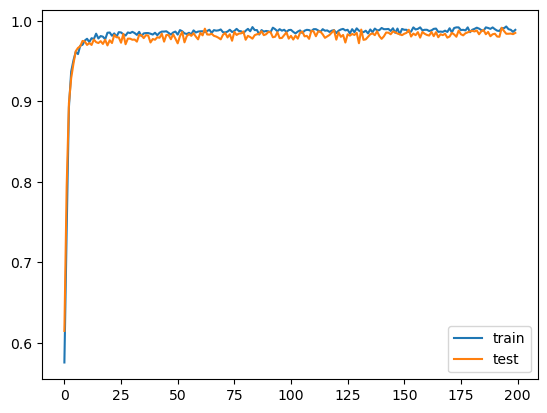

In [60]:
import matplotlib.pyplot as plt
plt.plot(train_accs,label = "train")
plt.plot(test_accs,'-',label = "test")
plt.legend()
plt.show()

# model graph flourier transformation

In [61]:
from torch_geometric.nn import ChebConv,GATConv
class Cheb(Module):
    def __init__(self,in_channel,hidden_channels,out_channel,dropout_rate,resize_num =211 ):
        super().__init__()
        self.convs = []
        
        prev_channels = in_channel
        for channel in hidden_channels:
            self.convs.append(ChebConv(prev_channels,channel,K = 2))
            prev_channels = channel
        self.convs = torch.nn.ModuleList(self.convs)
        self.linear = Linear(prev_channels*resize_num,out_channel)
        self.relu = ReLU()
        self.dropout = Dropout(dropout_rate)
        self.sigmoid = Sigmoid()
        self.tanh = tanh
        
    def forward(self,x,edge_index,edge_attr,batch_size = 128):
        #print(x.reshape(batch_size,-1))
        for i, conv in enumerate(self.convs):
            
            
            x = conv(x,edge_index,edge_attr)
            x = self.dropout(x)
            if i != len(self.convs)-1:
                x = self.relu(x)
        #print(x.reshape(batch_size,-1))
        x = x.reshape(batch_size,-1)
        #print(x)
        #x = self.tanh(x)
        x = self.linear(x)
        x = self.sigmoid(x)
        #print(x)
        
        
        return x

loss = torch.nn.BCELoss()

       
            
model2 = Cheb(1,[16,1],1,0.3)
optimizer = torch.optim.Adam(model2.parameters(),lr = 0.001)   
train_accs, test_accs = train(model2,loss,optimizer,200,train_loader,test,test_loader)        

test  accs is  tensor(0.5938)
epoch  0  is  tensor(0.0330, grad_fn=<DivBackward0>)  accs is  tensor(0.5290)
test  accs is  tensor(0.6870)
epoch  1  is  tensor(0.0290, grad_fn=<DivBackward0>)  accs is  tensor(0.6436)
test  accs is  tensor(0.8349)
epoch  2  is  tensor(0.0239, grad_fn=<DivBackward0>)  accs is  tensor(0.7730)
test  accs is  tensor(0.8825)
epoch  3  is  tensor(0.0195, grad_fn=<DivBackward0>)  accs is  tensor(0.8612)
test  accs is  tensor(0.9352)
epoch  4  is  tensor(0.0120, grad_fn=<DivBackward0>)  accs is  tensor(0.9155)
test  accs is  tensor(0.9450)
epoch  5  is  tensor(0.0097, grad_fn=<DivBackward0>)  accs is  tensor(0.9225)
test  accs is  tensor(0.9445)
epoch  6  is  tensor(0.0074, grad_fn=<DivBackward0>)  accs is  tensor(0.9534)
test  accs is  tensor(0.9545)
epoch  7  is  tensor(0.0056, grad_fn=<DivBackward0>)  accs is  tensor(0.9650)
test  accs is  tensor(0.9660)
epoch  8  is  tensor(0.0054, grad_fn=<DivBackward0>)  accs is  tensor(0.9634)
test  accs is  tensor(0.9616

In [37]:
import matplotlib.pyplot as plt
plt.plot(train_accs,label = "train")
plt.plot(test_accs,'-',label = "test")
plt.title("graph flourier transformation")
plt.legend()
plt.show()

NameError: name 'train_accs' is not defined

# Graph attention 

In [208]:
class GAT(Module):
    def __init__(self,in_channel,hidden_channels,out_channel,dropout_rate,resize_num =211 ):
        super().__init__()
        self.convs = []
        
        prev_channels = in_channel
        for channel in hidden_channels:
            self.convs.append(GATConv(prev_channels,channel,head = 2))
            prev_channels = channel
        self.convs = torch.nn.ModuleList(self.convs)
        self.linear = Linear(prev_channels*resize_num,out_channel)
        self.relu = ReLU()
        self.dropout = Dropout(dropout_rate)
        self.sigmoid = Sigmoid()
        self.tanh = tanh
        
    def forward(self,x,edge_index,edge_attr,batch_size = 128):
        #print(x.reshape(batch_size,-1))
        for i, conv in enumerate(self.convs):
            
            
            x = conv(x,edge_index,edge_attr)
            x = self.dropout(x)
            if i != len(self.convs)-1:
                x = self.relu(x)
        #print(x.reshape(batch_size,-1))
        x = x.reshape(batch_size,-1)
        #print(x)
        x = self.tanh(x)
        x = self.linear(x)
        x = self.sigmoid(x)
        #print(x)
        
        
        return x

loss = torch.nn.BCELoss()

       
            
model2 = Cheb(1,[16,32,64,32,16,1],1,0.3)
optimizer = torch.optim.Adam(model2.parameters(),lr = 0.001)   
train_accs, test_accs = train(model2,loss,optimizer,200,train_loader,test,test_loader)

test  accs is  tensor(0.5833)
epoch  0  is  tensor(0.0536, grad_fn=<DivBackward0>)  accs is  tensor(0.5104)
test  accs is  tensor(0.5625)
epoch  1  is  tensor(0.0505, grad_fn=<DivBackward0>)  accs is  tensor(0.5303)
test  accs is  tensor(0.5208)
epoch  2  is  tensor(0.0504, grad_fn=<DivBackward0>)  accs is  tensor(0.6328)
test  accs is  tensor(0.6042)
epoch  3  is  tensor(0.0454, grad_fn=<DivBackward0>)  accs is  tensor(0.6494)
test  accs is  tensor(0.8021)
epoch  4  is  tensor(0.0412, grad_fn=<DivBackward0>)  accs is  tensor(0.8066)
test  accs is  tensor(0.9062)
epoch  5  is  tensor(0.0340, grad_fn=<DivBackward0>)  accs is  tensor(0.9135)
test  accs is  tensor(0.9375)
epoch  6  is  tensor(0.0262, grad_fn=<DivBackward0>)  accs is  tensor(0.9423)
test  accs is  tensor(0.9688)
epoch  7  is  tensor(0.0235, grad_fn=<DivBackward0>)  accs is  tensor(0.9423)
test  accs is  tensor(0.9688)
epoch  8  is  tensor(0.0212, grad_fn=<DivBackward0>)  accs is  tensor(0.9615)
test  accs is  tensor(0.9688

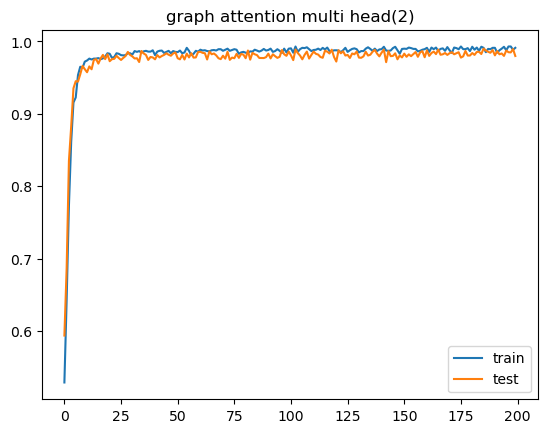

In [63]:
import matplotlib.pyplot as plt
plt.plot(train_accs,label = "train")
plt.plot(test_accs,'-',label = "test")
plt.title("graph attention multi head(2)")
plt.legend()
plt.show()